In [2]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [3]:
tag = pd.read_csv('data_nountag_all_song_ver2.csv', encoding = 'cp949')
tag

,Unnamed: 0,tv,title,epi,dates,links,synop,vod_key
0,0.0,MBC,MBC 스페셜,"생존 체력, 약골 40대 저질체력 탈출기",2018.10.01,http://www.imbc.com/broad/tv/culture/mbcspecia...,"“마흔 살, ‘생존 체력’이 필요하다” \r\r\r\r\r\r\r\n ‘불혹’...","'체력', '나이', '정신', '일상', '운동', '40대', '시간', '아이..."
1,1.0,MBC,MBC 스페셜,"당신, 독을 먹고 있나요?",2018.09.10,http://www.imbc.com/broad/tv/culture/mbcspecia...,"■ \r\r\r\r\r\r\r\n스위트 드림(Sweet Dream), 허니문(...","'달콤함', '인도', '설탕', '과거', '섭취', '단맛'"
2,2.0,MBC,MBC 스페셜,방송의 날 특집6개월 후 만납시다: 북한 결핵병원 이야기,2018.09.03,http://www.imbc.com/broad/tv/culture/mbcspecia...,"■ \r\r\r\r\r\r\r\n2018년, 한반도가 급변하기 시작했다. 11...","'한반도', '북한', '이야기', '의사', '환자들', '치료', '다큐멘터리'..."
3,3.0,MBC,MBC 스페셜,이산가족 상봉 특집 <옥류관 서울 1호점> 3부 이산,2018.08.20,http://www.imbc.com/broad/tv/culture/mbcspecia...,역사적인 4.27 남북정상회담을 계기로 8월 20일부터 26일까지 2015년 이후 ...,"'이산', '이산가족', '상봉', '행사', '70년', '길자', '평양', '..."
4,4.0,MBC,MBC 스페셜,도시x자연다큐멘터리Ⅰ 고냥이,2018.08.13,http://www.imbc.com/broad/tv/culture/mbcspecia...,■ \r\r\r\r\r\r\r\n1인 가구의 증가와 고령화 사회 속에서 반려동...,"'도시', '길고양이', '고양이', '영역', '어미', '불청객', '새끼들'"
5,5.0,MBC,MBC 스페셜,강유미의 재벌 3세 탐구기,2018.07.30,http://www.imbc.com/broad/tv/culture/mbcspecia...,"■ \r\r\r\r\r\r\r\n \r\r\r\r\r\r\r\n지난 4월, 한...","'3세', '전무', '갑질', '재벌', '수행기사', '사건', '강유미', '..."
6,6.0,MBC,MBC 스페셜,고마워요 조용필,2018.07.23,http://www.imbc.com/broad/tv/culture/mbcspecia...,가왕 조용필이 데뷔 50주년을 맞았다. 그리고 그의 곁에는 음악 인생 50년을 함께...,"'조용필', '인생', '50년', '팬들', '자리', '고마움', '시절', '..."
7,7.0,MBC,MBC 스페셜,<옥류관 서울 1호점> 2부 냉면의 민족,2018.07.16,http://www.imbc.com/broad/tv/culture/mbcspecia...,"지난 7월 9일 방송된 <옥류관 서울 1호점>은 방송인 주병진, 작곡가 돈스파이크 ...","'옥류관', '서울', '1호점', '평양', '평양냉면', '공개', '일본', ..."
8,8.0,MBC,MBC 스페셜,<옥류관 서울 1호점> 1부 평양냉면 제일일세,2018.07.09,http://www.imbc.com/broad/tv/culture/mbcspecia...,"■ 2018 평양냉면 전성시대 \r\r\r\r\r\r\r\n지난 4월 27일, ...","'평양', '평양냉면', '냉면', '냉면집', '옥류관'"
9,9.0,MBC,MBC 스페셜,6월항쟁 특집 : 어머니와 사진사,2018.06.11,http://www.imbc.com/broad/tv/culture/mbcspecia...,"■ \r\r\r\r\r\r\r\n1987년 6월, 독재 권력의 억압에 맞서 ‘...","'1987년', '그날', '거리', '최루탄', '학생', '민주주의', '역사'..."


In [4]:
df = tag.drop(tag.index[[-1, -2, -3, -4, -5, -6, -7]])
df

,Unnamed: 0,tv,title,epi,dates,links,synop,vod_key
0,0.0,MBC,MBC 스페셜,"생존 체력, 약골 40대 저질체력 탈출기",2018.10.01,http://www.imbc.com/broad/tv/culture/mbcspecia...,"“마흔 살, ‘생존 체력’이 필요하다” \r\r\r\r\r\r\r\n ‘불혹’...","'체력', '나이', '정신', '일상', '운동', '40대', '시간', '아이..."
1,1.0,MBC,MBC 스페셜,"당신, 독을 먹고 있나요?",2018.09.10,http://www.imbc.com/broad/tv/culture/mbcspecia...,"■ \r\r\r\r\r\r\r\n스위트 드림(Sweet Dream), 허니문(...","'달콤함', '인도', '설탕', '과거', '섭취', '단맛'"
2,2.0,MBC,MBC 스페셜,방송의 날 특집6개월 후 만납시다: 북한 결핵병원 이야기,2018.09.03,http://www.imbc.com/broad/tv/culture/mbcspecia...,"■ \r\r\r\r\r\r\r\n2018년, 한반도가 급변하기 시작했다. 11...","'한반도', '북한', '이야기', '의사', '환자들', '치료', '다큐멘터리'..."
3,3.0,MBC,MBC 스페셜,이산가족 상봉 특집 <옥류관 서울 1호점> 3부 이산,2018.08.20,http://www.imbc.com/broad/tv/culture/mbcspecia...,역사적인 4.27 남북정상회담을 계기로 8월 20일부터 26일까지 2015년 이후 ...,"'이산', '이산가족', '상봉', '행사', '70년', '길자', '평양', '..."
4,4.0,MBC,MBC 스페셜,도시x자연다큐멘터리Ⅰ 고냥이,2018.08.13,http://www.imbc.com/broad/tv/culture/mbcspecia...,■ \r\r\r\r\r\r\r\n1인 가구의 증가와 고령화 사회 속에서 반려동...,"'도시', '길고양이', '고양이', '영역', '어미', '불청객', '새끼들'"
5,5.0,MBC,MBC 스페셜,강유미의 재벌 3세 탐구기,2018.07.30,http://www.imbc.com/broad/tv/culture/mbcspecia...,"■ \r\r\r\r\r\r\r\n \r\r\r\r\r\r\r\n지난 4월, 한...","'3세', '전무', '갑질', '재벌', '수행기사', '사건', '강유미', '..."
6,6.0,MBC,MBC 스페셜,고마워요 조용필,2018.07.23,http://www.imbc.com/broad/tv/culture/mbcspecia...,가왕 조용필이 데뷔 50주년을 맞았다. 그리고 그의 곁에는 음악 인생 50년을 함께...,"'조용필', '인생', '50년', '팬들', '자리', '고마움', '시절', '..."
7,7.0,MBC,MBC 스페셜,<옥류관 서울 1호점> 2부 냉면의 민족,2018.07.16,http://www.imbc.com/broad/tv/culture/mbcspecia...,"지난 7월 9일 방송된 <옥류관 서울 1호점>은 방송인 주병진, 작곡가 돈스파이크 ...","'옥류관', '서울', '1호점', '평양', '평양냉면', '공개', '일본', ..."
8,8.0,MBC,MBC 스페셜,<옥류관 서울 1호점> 1부 평양냉면 제일일세,2018.07.09,http://www.imbc.com/broad/tv/culture/mbcspecia...,"■ 2018 평양냉면 전성시대 \r\r\r\r\r\r\r\n지난 4월 27일, ...","'평양', '평양냉면', '냉면', '냉면집', '옥류관'"
9,9.0,MBC,MBC 스페셜,6월항쟁 특집 : 어머니와 사진사,2018.06.11,http://www.imbc.com/broad/tv/culture/mbcspecia...,"■ \r\r\r\r\r\r\r\n1987년 6월, 독재 권력의 억압에 맞서 ‘...","'1987년', '그날', '거리', '최루탄', '학생', '민주주의', '역사'..."


In [5]:
df.shape

(1891, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1891 entries, 0 to 1890
Data columns (total 8 columns):
Unnamed: 0    1891 non-null float64
tv            1891 non-null object
title         1891 non-null object
epi           1891 non-null object
dates         1891 non-null object
links         1773 non-null object
synop         1891 non-null object
vod_key       1655 non-null object
dtypes: float64(1), object(7)
memory usage: 133.0+ KB


In [7]:
# kbs=df[df['tv_x']=='KBS']
# writer = pd.ExcelWriter(r'kbs.xlsx', engine='xlsxwriter',options={'strings_to_urls': False})
# kbs.to_excel(writer)
# writer.close()

In [8]:
df['synop']

0        “마흔 살, ‘생존 체력’이 필요하다”  \r\r\r\r\r\r\r\n  ‘불혹’...
1        ■   \r\r\r\r\r\r\r\n스위트 드림(Sweet Dream), 허니문(...
2        ■   \r\r\r\r\r\r\r\n2018년, 한반도가 급변하기 시작했다. 11...
3       역사적인 4.27 남북정상회담을 계기로 8월 20일부터 26일까지 2015년 이후 ...
4        ■   \r\r\r\r\r\r\r\n1인 가구의 증가와 고령화 사회 속에서 반려동...
5        ■   \r\r\r\r\r\r\r\n \r\r\r\r\r\r\r\n지난 4월, 한...
6       가왕 조용필이 데뷔 50주년을 맞았다. 그리고 그의 곁에는 음악 인생 50년을 함께...
7       지난 7월 9일 방송된 <옥류관 서울 1호점>은 방송인 주병진, 작곡가 돈스파이크 ...
8        ■ 2018 평양냉면 전성시대  \r\r\r\r\r\r\r\n지난 4월 27일, ...
9        ■   \r\r\r\r\r\r\r\n1987년 6월, 독재 권력의 억압에 맞서 ‘...
10       ■   \r\r\r\r\r\r\r\n2018년 5월 10일 오전 9시 누운 배가 ...
11      남북정상회담 D-1. 불과 작년, 핵 실험으로 얼어붙었던 겨울을 지나 평화의 희망이...
12       ■   \r\r\r\r\r\r\r\n모든 다이버들은 다이빙을 하고 나면 기록을 한...
13       []  \r\r\r\r\r\r\r\n2018년 4월 16일. 세월호 참사 4주기를...
14       ■   \r\r\r\r\r\r\r\n 올해 쉰 살이 된 삼성전자 부회장 이재용. ...
15       MBC스페셜 봄 개편 특집 다큐멘터리 <10년 후의 세계>가 지난 3월 26일 1...
16       MBC스페셜이 봄 개편을 맞아 특집 2부작 다큐멘터리 <10년 후의 세계>를 선보...
17       ■   \

In [9]:
from soynlp.tokenizer import RegexTokenizer, LTokenizer, MaxScoreTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [10]:
sample_index = 50

In [11]:
sample_title = df['epi'][sample_index]
sample_title

'리더의 조건 - 두테르테와 트럼프'

In [12]:
sample_synop = df['synop'][sample_index]
sample_synop

' ■ 아웃사이더의 반란, 막말과 기행에도 국민의 선택을 받은 리더들의 등장! \r\r\r\r\r\r\r\n \r\r\r\r\r\r\r\n 2017년, 세계는 두 명의 리더들에 주목하고 있다! “Only America First”를 외치며 \r\r\r\r\r\r\r\n등장한 정치계의 이단아 도널드 트럼프 미국 대통령과, 온갖 막말과 초법적 살인에\r\r\r\r\r\r\r\n도 국민의 80%가 지지를 보내는 로드리고 두테르테 필리핀 대통령. 사람들은 두 사\r\r\r\r\r\r\r\n람을 막말과 기행을 일삼는 아웃사이더라 불렀으며, 대중들을 현혹시키는 포퓰리스\r\r\r\r\r\r\r\n트라 불렀다.\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\n 그러나 대중들에게 정치적 올바름은 더 이상 중요한 문제가 아니었다. 두 리더들은 \r\r\r\r\r\r\r\n대중에게 상식과 진리로 여겨진 가치를 무너뜨리고, 민중의 삶을 대변하지 못한 기\r\r\r\r\r\r\r\n성 정치인들을 통렬히 비판하며 대중을 현혹시켰다. 그들이 대중을 현혹시킬 수 있\r\r\r\r\r\r\r\n었던 배경은 무엇이었고 누가, 왜 이 위험한 리더들을 탄생시켰는가? '

In [13]:
sample_tag = df['vod_key'][sample_index]
sample_tag

"'막말', '리더들', '대중'"

In [14]:
tokened_title = tokenizer.tokenize(sample_title)
tokened_title

['리더의', '조건', '-', '두테르테와', '트럼프']

In [15]:
tokened_synop = tokenizer.tokenize(sample_content)
tokened_synop[:10]

NameError: name 'sample_content' is not defined

In [16]:
tokened_tag = tokenizer.tokenize(sample_tag)
tokened_tag


["'", '막말', "',", "'", '리더들', "',", "'", '대중', "'"]

In [17]:
print(len(tokened_title))
print(len(tokened_synop))
print(len(tokened_tag))

5


NameError: name 'tokened_synop' is not defined

In [18]:
# 텍스트 데이터 전처리
import re

In [19]:
def preprocessing(text):
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    return text

In [20]:
df['vod_key'] =df['vod_key'].astype('str')

In [21]:
%time sentences = df['vod_key'].apply(preprocessing)

Wall time: 3 ms


In [22]:
sentences

0       '체력', '나이', '정신', '일상', '운동', '40대', '시간', '아이...
1                     '달콤함', '인도', '설탕', '과거', '섭취', '단맛'
2       '한반도', '북한', '이야기', '의사', '환자들', '치료', '다큐멘터리'...
3       '이산', '이산가족', '상봉', '행사', '70년', '길자', '평양', '...
4           '도시', '길고양이', '고양이', '영역', '어미', '불청객', '새끼들'
5       '3세', '전무', '갑질', '재벌', '수행기사', '사건', '강유미', '...
6       '조용필', '인생', '50년', '팬들', '자리', '고마움', '시절', '...
7       '옥류관', '서울', '1호점', '평양', '평양냉면', '공개', '일본', ...
8                        '평양', '평양냉면', '냉면', '냉면집', '옥류관'
9       '1987년', '그날', '거리', '최루탄', '학생', '민주주의', '역사'...
10      '목포', '수색', '크레인', '바다', '진행', '사진', '가슴', '마음...
11      '평화', '한반도', '김정은', '북한', '모습', '중국', '스위스', '...
12      '다이빙', '잠수', '수색', '가족', '참사', '현장', '그들', '아이...
13      '세월호', '아이', '부모들', '그들', '아픔', '이들', '아이들', '...
14                                                   '자리'
15      '세계', '일자리', '관심', '저항', '기술', '로봇', '인류', '인공...
16      '10년', '세계', '속도', '첨단기술', '기술', '인간', '일자리', ...
17      '최저임금'

In [41]:
type(sentences[1])

str

In [23]:
# %time sentences = df['epi'].apply(preprocessing)

In [24]:
%time tokens = sentences.apply(tokenizer.tokenize)
tokens[:3]

Wall time: 313 ms


0    [', 체력, ',, ', 나이, ',, ', 정신, ',, ', 일상, ',, '...
1    [', 달콤함, ',, ', 인도, ',, ', 설탕, ',, ', 과거, ',, ...
2    [', 한반도, ',, ', 북한, ',, ', 이야기, ',, ', 의사, ',,...
Name: vod_key, dtype: object

In [25]:
tokens[sample_index][:10]

["'", '막말', "',", "'", '리더들', "',", "'", '대중', "'"]

In [26]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 나눔고딕 설치
import matplotlib.font_manager as fm
fontpath = 'NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [27]:
!pip install -q 'wordcloud[all]'

Invalid requirement: ''wordcloud[all]''
Traceback (most recent call last):
  File "c:\anaconda\lib\site-packages\pip\_vendor\packaging\requirements.py", line 93, in __init__
    req = REQUIREMENT.parseString(requirement_string)
  File "c:\anaconda\lib\site-packages\pip\_vendor\pyparsing.py", line 1632, in parseString
    raise exc
  File "c:\anaconda\lib\site-packages\pip\_vendor\pyparsing.py", line 1622, in parseString
    loc, tokens = self._parse( instring, 0 )
  File "c:\anaconda\lib\site-packages\pip\_vendor\pyparsing.py", line 1379, in _parseNoCache
    loc,tokens = self.parseImpl( instring, preloc, doActions )
  File "c:\anaconda\lib\site-packages\pip\_vendor\pyparsing.py", line 3395, in parseImpl
    loc, exprtokens = e._parse( instring, loc, doActions )
  File "c:\anaconda\lib\site-packages\pip\_vendor\pyparsing.py", line 1379, in _parseNoCache
    loc,tokens = self.parseImpl( instring, preloc, doActions )
  File "c:\anaconda\lib\site-packages\pip\_vendor\pyparsing.py", line 3

In [28]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = fontpath,
                        stopwords = STOPWORDS, # 한국어는 해당이 없습니다. 한국어를 적용해 주려면 별도 처리가 필요합니다.
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

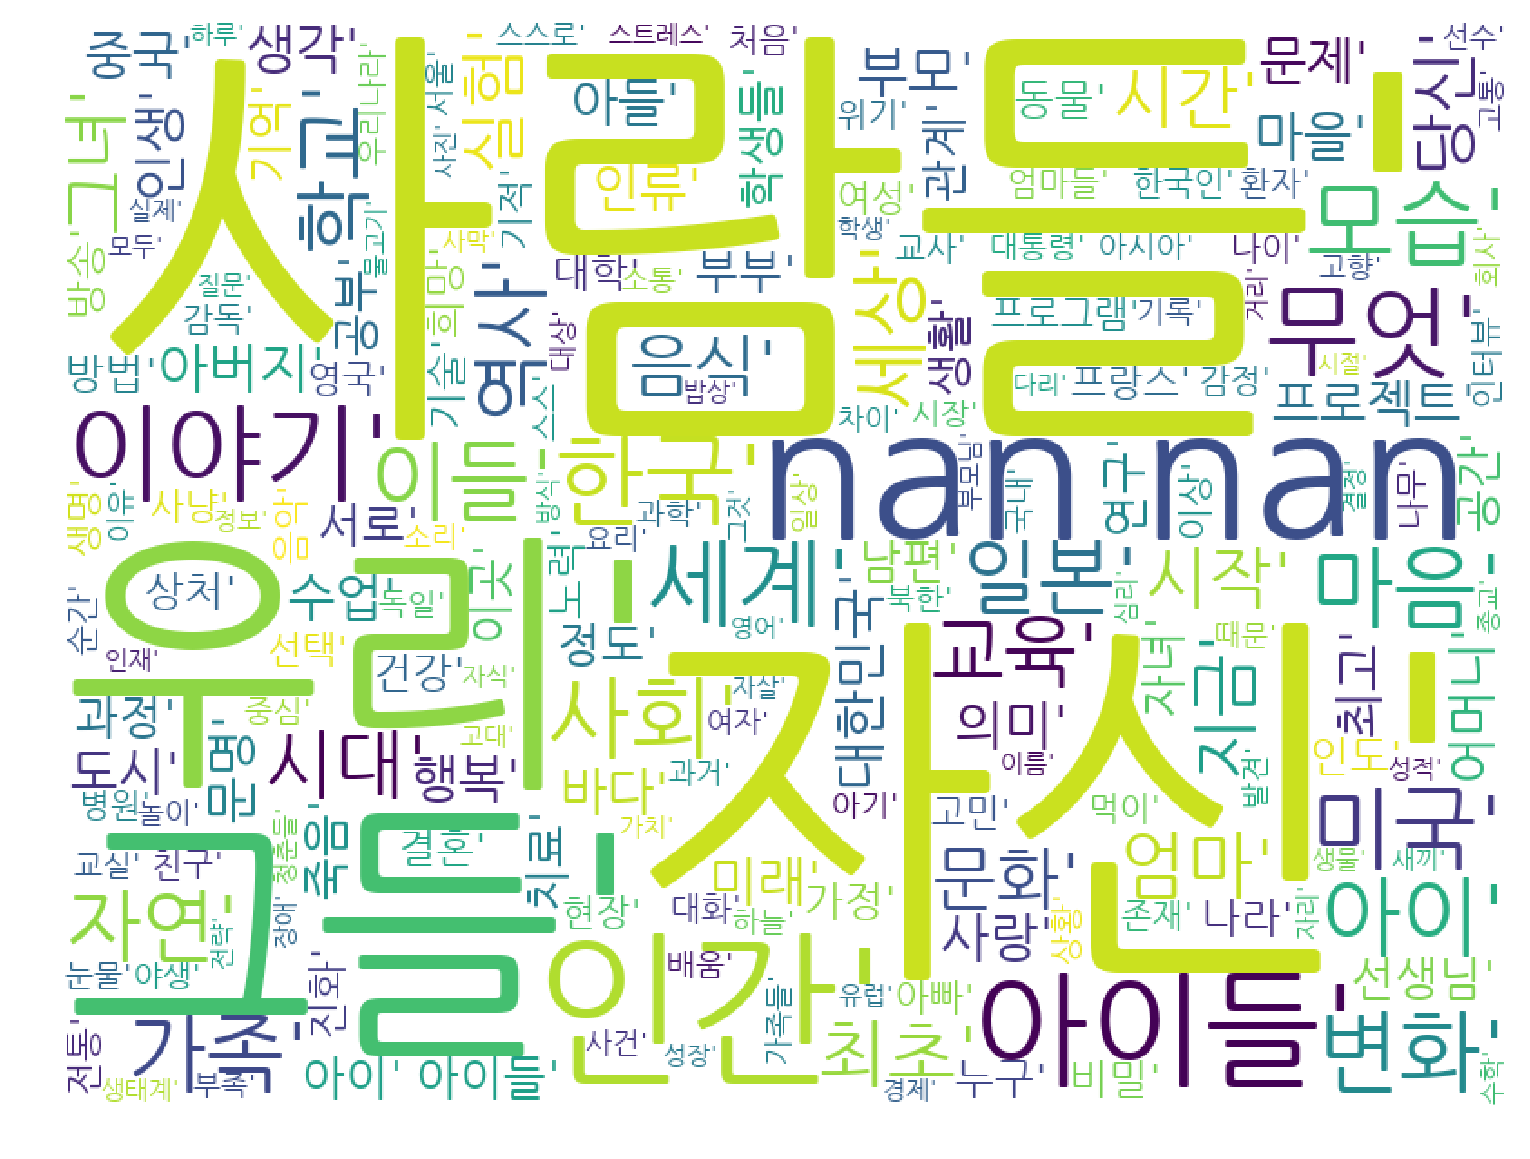

Wall time: 3.88 s


In [29]:
%time displayWordCloud(' '.join(sentences))

In [30]:
def remove_stopwords(text):
    stops = ['그들', '우리', '누구', 'nan']
    # Stopwords 불용어 제거
    meaningful_words = [word for word in text if not word in stops]
    return ' '.join(meaningful_words)

In [31]:
%time displayWordCloud(' '.join(tokens_remove_stopwords))

NameError: name 'tokens_remove_stopwords' is not defined

In [32]:
from soynlp.noun import LRNounExtractor

In [33]:
%%time
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(sentences)
nouns = noun_extractor.extract()

used default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (2952, 1527) tokens
building lr-graph completedWall time: 342 ms


In [34]:
nouns

{}

In [35]:
# 추출된 명사를 찍어봅니다.
%time displayWordCloud(' '.join(nouns))

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [36]:
# # 불용어 제거
# def remove_stopwords(text):
#     tokens = text.split(' ')
#     stops = ['있다', '것인가', '스페셜', '정리', '생각', '기적']
#     meaningful_words = [w for w in tokens if not w in stops]
#     return ' '.join(meaningful_words)

In [37]:
df['dates_x'] = pd.to_datetime(df['dates_x'])
df['dates_x']

KeyError: 'dates_x'

In [ ]:
2008 = (df['dates_x']> 2018-3-3) & (df['dates_x'] <= 2018-12-31)
2008

In [ ]:
2008 = pd.df(np.random.ramdom.((200,3)))
df['dates_x'] = pd.date_range('2008-')

In [ ]:
tag = pd.read_csv('data_nountag_all_song_ver2.csv', encoding = 'cp949')
tag